En este Archivo vamos a tomar 3 modelos 'X, Y, Z' y vamos a graficar una predicción y observaremos que tan próximos son sus predicciones... :-)


In [3]:

import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 

import sys
sys.path.append('../')
from Utils import plotter

In [4]:
x_test = pd.read_excel("../Train_Test/Dataset_Separado/x_test.xlsx")
y_test = pd.read_excel("../Train_Test/Dataset_Separado/y_test.xlsx")

In [5]:
# Obtenemos los modelos que vamos a utilizar para el test
# En este caso serán 3 modelos distintos, ya que el entrenamiento 
# se lo realizo de manera individual.
model_X = tf.keras.models.load_model('../modelos_entrenamiento/modelos_x/mod_x_400_90.keras')
model_Y = tf.keras.models.load_model('../modelos_entrenamiento/modelos_y/mod_y_440_80_vs10_Adam_loss_32.keras')
model_Z = tf.keras.models.load_model('../modelos_entrenamiento/modelos_z/mod_z_1000_70_vs10_adamW_loss_57.keras')

In [6]:
idx = 1
 
pred_x = model_X.predict(np.expand_dims(x_test.iloc[idx], axis=0))
pred_y = model_Y.predict(np.expand_dims(x_test.iloc[idx], axis=0))
pred_z = model_Z.predict(np.expand_dims(x_test.iloc[idx], axis=0))

pred_x = pred_x.flatten()
pred_y = pred_y.flatten()
pred_z = pred_z.flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


In [7]:
# Localizo el idx en y_test lo separo en 3 arrays, transf de Serie a Array numpy
true_coord = y_test.iloc[idx]
true_x = true_coord[0:100].to_numpy()
true_y = true_coord[100:200].to_numpy()
true_z = true_coord[200:300].to_numpy()


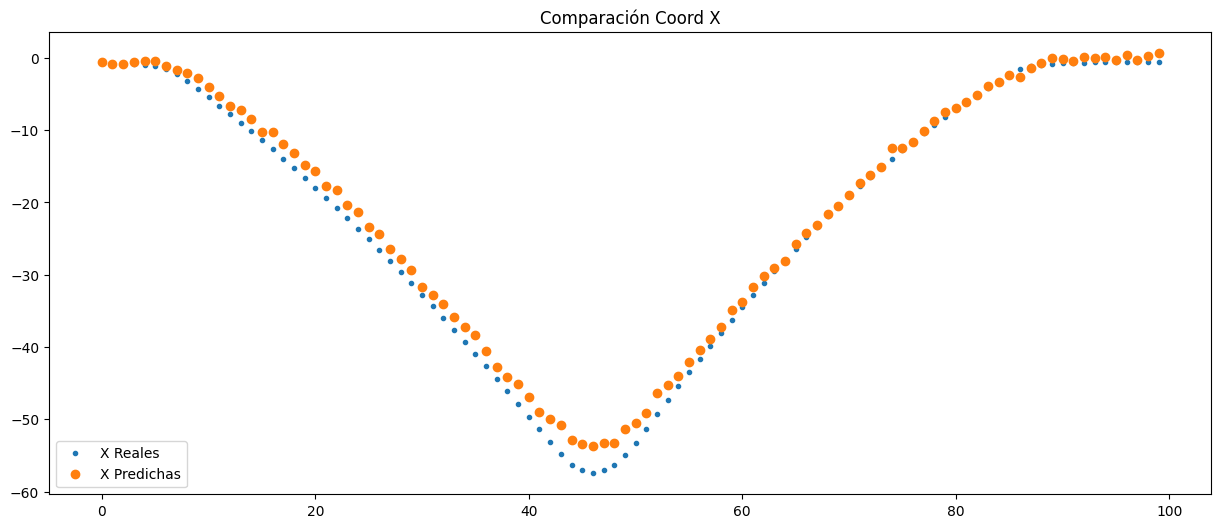

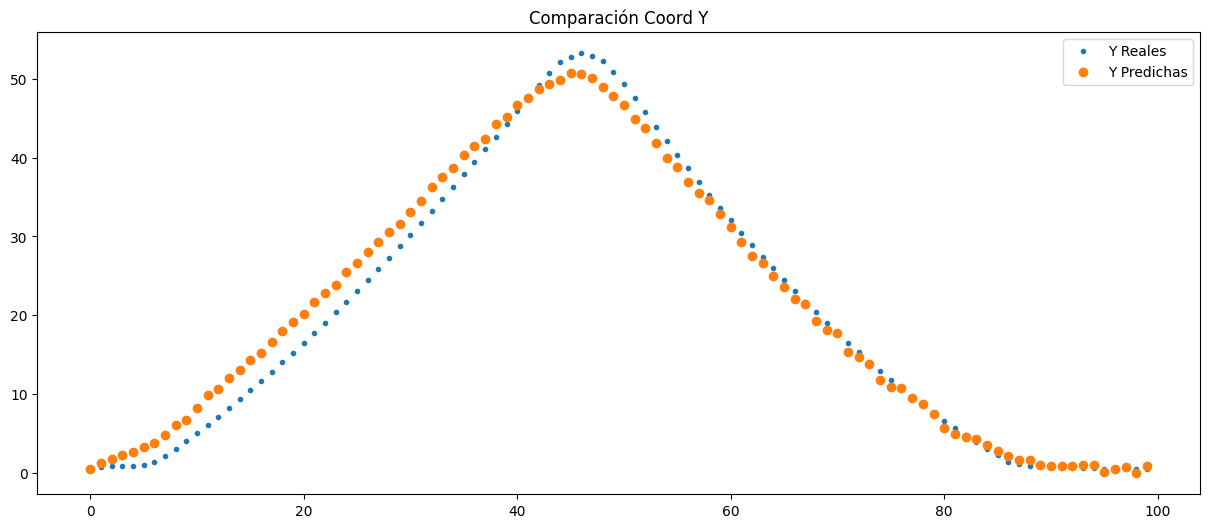

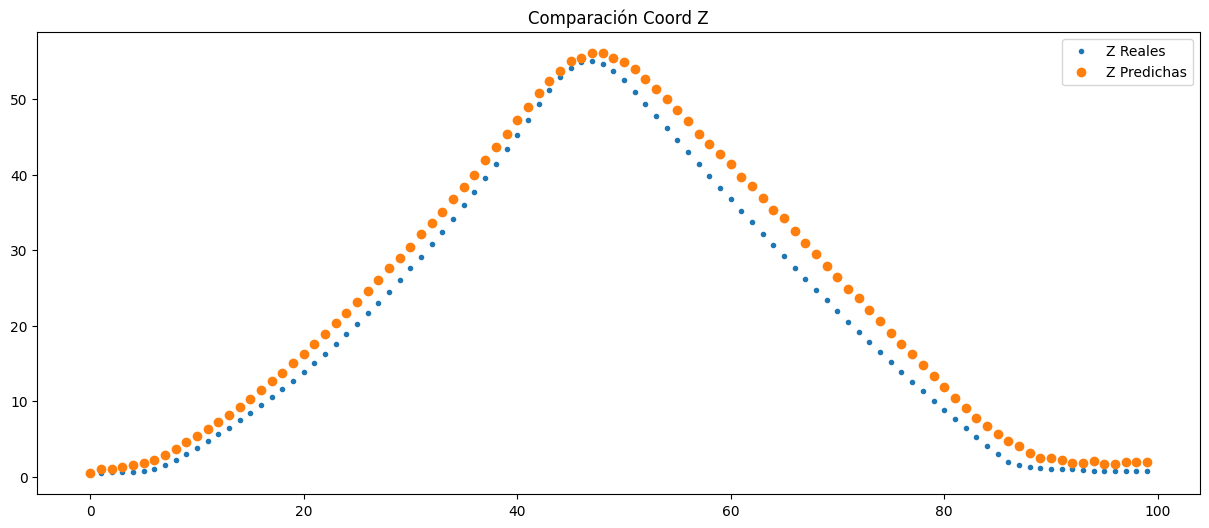

In [8]:

import matplotlib.pyplot as plt
# Gráfica X
plotter.plot_1D(true_x,pred_x,'X')
# Gráfica Y
plotter.plot_1D(true_y,pred_y,'Y')
# Gráfica Z
plotter.plot_1D(true_z,pred_z,'Z')


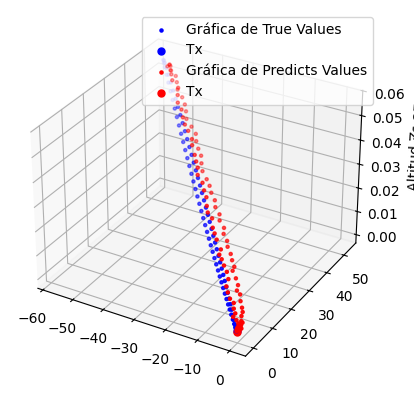

In [9]:

# plotter.plot_3D(true_x,true_y,true_z,"blue",".")
# %matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax = plotter.plot_3D(true_x,true_y,true_z, ax = ax,color = 'blue',label = "True Values",marker = ".")
ax = plotter.plot_3D(pred_x,pred_y,pred_z,ax=ax, color='red',label='Predicts Values',marker='.')
plt.show()


In [ ]:
from Utils import geo_conversions as gc

# Transformaremos las coordenadas cartesianas a Esfericas  
# Hasta aquí tenemos una muestra predicha de 300 pts.

phi,theta,rho = gc.transform_cartesian_to_spherical(true_x,true_y,true_z)
phi_pred,theta_pred,rho_pred= gc.transform_cartesian_to_spherical(pred_x,pred_y,pred_z)

latitude_true,longitude_true,height_true = gc.transform_spherical_to_geographic(phi,theta,rho)
latitude_pred,longitude_pred,height_pred = gc.transform_spherical_to_geographic(phi_pred,theta_pred,rho_pred)
# Acá lo que busco es posicionarme en un index de los 100 del array y ver
# su transformación en coordenadas esfericas y luego geograficas.

index = 97
print(f'Valores que ingresan en true x={true_x[97]} y={true_y[97]} z={true_z[97]}')
print(f'Valores que ingresan en pred x ={pred_x[97]} y={pred_y[97]}, z={pred_z[97]}')

print(f'Esfericas true phi:{phi[index]},theta:{theta[index]},rho:{rho[index]}')
print(f'Esfericas pred phi:{phi_pred[index]},theta:{theta_pred[index]},rho:{rho_pred[index]}')

print(f'Geograficas true: Latitud{latitude_true}, Longitud:{longitude_true}, Altura:{height_true}')
print(f'Geograficas pred: Latitud{latitude_pred}, Longitud:{longitude_pred}, Altura:{height_pred}')

phi_a,theta_a,rho_a = gc.transform_cartesian_to_spherical(true_x[index],true_y[index],true_z[index])
print(f'{phi_a},{theta_a},{rho_a}')
print(f'Latitude:{np.degrees(phi_a)} Longitude: {np.degrees(theta_a)}')





Valores que ingresan en true x=-0.5357949974401146 y=0.4955798469224962 z=0.6975617560169983
Valores que ingresan en pred x =-0.33120033144950867 y=0.6523454785346985, z=1.9199435710906982
Esfericas true phi:-0.7464261167051033,theta:-0.8080119273818183,rho:1.0095880681818181
Esfericas pred phi:-1.1010022163391113,theta:-0.36406973004341125,rho:2.054612398147583
-0.7464261167051033,-0.8080119273818183,1.0095880681818181
Latitude:-42.76706620554185 Longitude: -46.29567323520934


In [11]:
latitude,longitude,height = gc.transform_spherical_to_geographic(phi,theta,rho)
latitude_pred,longitude_pred, height_pred = gc.transform_spherical_to_geographic(phi_pred,theta_pred,rho_pred) 

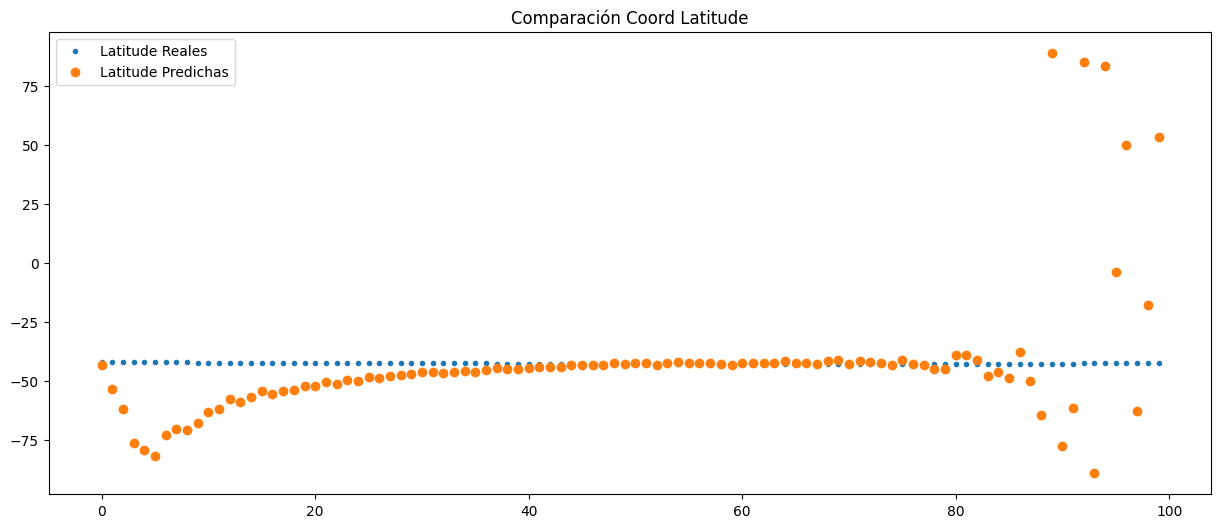

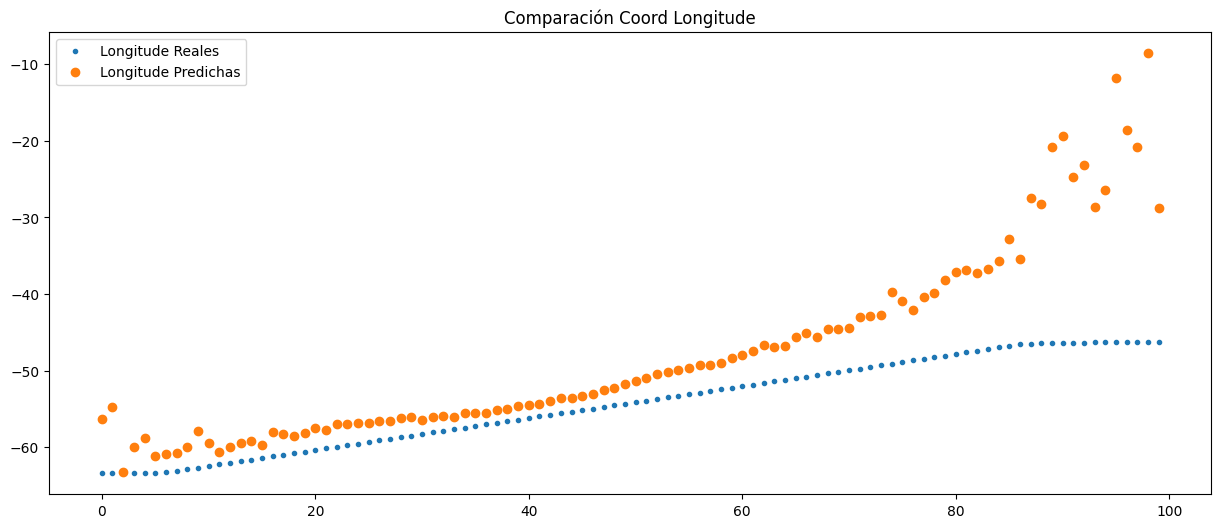

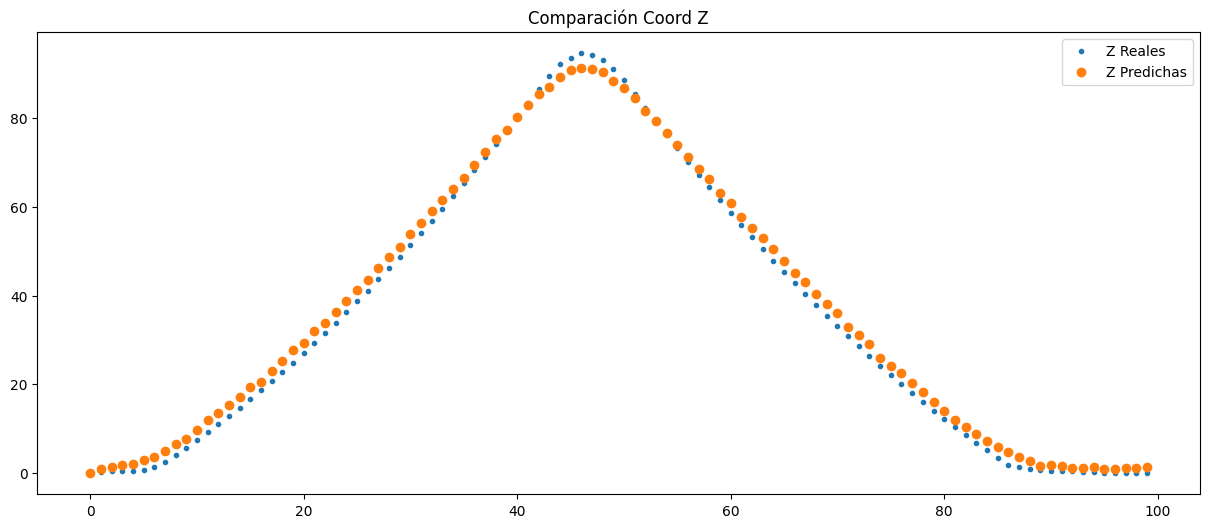

In [12]:
# Gráficas
# Gráfica X
plotter.plot_1D(latitude,latitude_pred,'Latitude')
# Gráfica Y
plotter.plot_1D(longitude,longitude_pred,'Longitude')
# Gráfica Z
plotter.plot_1D(height,height_pred,'Z')

In [13]:
import sys
import os 
# Obtenemos Ruta absoluta del directorio principal
ruta_principal = os.path.abspath(os.path.join(os.getcwd(),'..'))
# Agregamos ruta principal a sys.path
print(os.getcwd())
if ruta_principal not in sys.path:
  print("ingresa")
  sys.path.append(ruta_principal)
  
print(ruta_principal)
print(os.getcwd())

f:\Ray_Tracing-main\Graficas 1D y 3D
ingresa
f:\Ray_Tracing-main
f:\Ray_Tracing-main\Graficas 1D y 3D


In [14]:
height[0]

np.float64(0.0)

In [15]:
from pruebas import transformar_a_radians,graficar_curvas

88.59113103694555


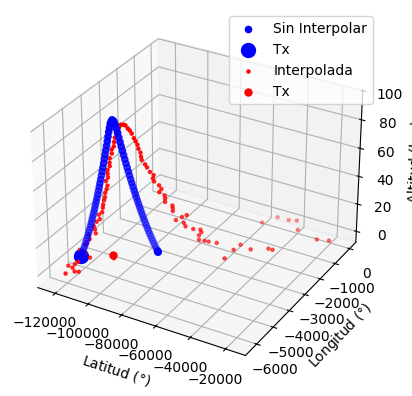

In [16]:
phi_true,theta_true,radio_true = transformar_a_radians(latitude,longitude,height)
print(height[50])
phi_pred,theta_pred,radio_pred =transformar_a_radians(latitude_pred,longitude_pred, height_pred)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax = graficar_curvas(phi_true,theta_true,radio_true, ax=ax, color = "blue", label = "Sin Interpolar",marker = "o")
ax = graficar_curvas(phi_pred,theta_pred,radio_pred, ax=ax , color = "red", label = "Interpolada", marker = "." )
plt.show()


In [17]:
radio_pred

array([6370864.5, 6371759.5, 6372186.5, 6372649. , 6373046. , 6373767.5,
       6374455.5, 6375826. , 6377403.5, 6378582. , 6380641.5, 6382860.5,
       6384444.5, 6386187. , 6388080. , 6390341.5, 6391563.5, 6393979.5,
       6396199. , 6398589. , 6400227.5, 6403020.5, 6404777.5, 6407358.5,
       6409731.5, 6412318. , 6414541. , 6417272.5, 6419711. , 6421975.5,
       6424978.5, 6427380.5, 6430075.5, 6432590.5, 6435035. , 6437591.5,
       6440460.5, 6443337. , 6446255. , 6448309. , 6451237. , 6453983. ,
       6456403. , 6458075.5, 6460386.5, 6461916. , 6462358. , 6462189.5,
       6461525. , 6459480.5, 6457964.5, 6455673.5, 6452649. , 6450308. ,
       6447708.5, 6445053.5, 6442233. , 6439463. , 6437303. , 6434223. ,
       6431900.5, 6428624. , 6426171.5, 6423932.5, 6421513.5, 6418869.5,
       6416192. , 6414131. , 6411295. , 6409077.5, 6407036.5, 6403861.5,
       6402184. , 6400091.5, 6396857.5, 6395196.5, 6393611.5, 6391360.5,
       6389225.5, 6387009.5, 6384958.5, 6382989.5, 